# <font color=red> IMDb Horror Movie Genre 👻

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns 
from pandas_profiling import ProfileReport

%matplotlib inline

### Working only with the data of movies classified as horror as their main or subgenre

In [2]:
movies_horror = pd.read_csv('./Genres/data_movies_ratings_Horror.csv')

In [3]:
movies_horror.head(5)

imdb_title_id                                              title  year  \
0     tt0003419                               Der Student von Prag  1913   
1     tt0003643  The Avenging Conscience: or 'Thou Shalt Not Kill'  1914   
2     tt0004026                                          Der Golem  1915   
3     tt0005529                                        Hævnens Nat  1916   
4     tt0005951                                  Rapsodia satanica  1917   

  date_published                   genre  duration  country         language  \
0     1913-08-22  Drama, Fantasy, Horror        85  Germany  German, English   
1     1914-08-24    Crime, Drama, Horror        78      USA          English   
2     1915-04-08                  Horror        60  Germany           German   
3     1916-09-25    Crime, Drama, Horror       100  Denmark              NaN   
4     1917-07-01  Drama, Fantasy, Horror        55    Italy              NaN   

                      director                                writer  ...  \
0    Paul Wegener, Stellan Rye  Hanns Heinz Ewers, Hanns Heinz Ewers  ...   
1                D.W. Griffith        Edgar Allan Poe, D.W. Griffith  ...   
2  Henrik Galeen, Paul Wegener           Henrik Galeen, Paul Wegener  ...   
3         Benjamin Christensen                  Benjamin Christensen  ...   
4                  Nino Oxilia      Alberto Fassini, Alberto Fassini  ...   

  females_30age_avg_vote  females_30age_votes  females_45age_avg_vote  \
0                    6.5                   89                     7.2   
1                    7.0                   34                     7.1   
2                    6.7                   67                     6.2   
3                    7.8                    9                     7.6   
4                    6.8                   28                     7.8   

   females_45age_votes  top1000_voters_rating  top1000_voters_votes  \
0                   69                    6.2                   114   
1                  211                    6.5                    85   
2                   89                    6.5                    53   
3                   15                    6.7                    37   
4                   21                    6.7                    66   

   us_voters_rating  us_voters_votes  non_us_voters_rating  \
0               6.3              338                   6.5   
1               6.5              576                   6.5   
2               6.8              413                   6.7   
3               7.1               53                   6.8   
4               7.1               82                   6.8   

   non_us_voters_votes  
0                  921  
1                  321  
2                  356  
3                  147  
4                  331  

[5 rows x 39 columns]

### Split genre column to isolate each individual genre

In [4]:
movies_horror_genres = (movies_horror['genre'].str.split(',', expand=True)).reset_index(drop=True)
movies_horror_genres

0          1        2
0      Drama    Fantasy   Horror
1      Crime      Drama   Horror
2     Horror       None     None
3      Crime      Drama   Horror
4      Drama    Fantasy   Horror
...      ...        ...      ...
9036  Horror   Thriller     None
9037  Comedy     Horror   Sci-Fi
9038  Horror       None     None
9039  Horror   Thriller     None
9040  Horror   Thriller     None

[9041 rows x 3 columns]

In [5]:
movies_horror_genres = movies_horror_genres.rename(columns={0:'Genre_1', 1:'Genre_2', 2:'Genre_3'})
movies_horror_genres

Genre_1    Genre_2  Genre_3
0      Drama    Fantasy   Horror
1      Crime      Drama   Horror
2     Horror       None     None
3      Crime      Drama   Horror
4      Drama    Fantasy   Horror
...      ...        ...      ...
9036  Horror   Thriller     None
9037  Comedy     Horror   Sci-Fi
9038  Horror       None     None
9039  Horror   Thriller     None
9040  Horror   Thriller     None

[9041 rows x 3 columns]

In [6]:
movies_horror = pd.concat([movies_horror_genres, movies_horror], axis=1)


In [7]:
movies_horror.isnull().sum()/len(movies_horror)*100

Genre_1                      0.000000
Genre_2                     24.211923
Genre_3                     56.077867
imdb_title_id                0.000000
title                        0.000000
year                         0.000000
date_published               0.000000
genre                        0.000000
duration                     0.000000
country                      0.110607
language                     1.139255
director                     0.066364
writer                       1.305165
production_company           5.773698
avg_vote                     0.000000
votes                        0.000000
reviews_from_users           0.000000
reviews_from_critics         0.000000
weighted_average_vote        0.000000
total_votes                  0.000000
males_allages_avg_vote       0.000000
males_allages_votes          0.000000
males_18age_avg_vote         0.000000
males_18age_votes            0.000000
males_30age_avg_vote         0.000000
males_30age_votes            0.000000
males_45age_

### Spliting country column to isolate each individual country

In [8]:
movies_horror_country = (movies_horror['country'].str.split(',', expand=True)).reset_index(drop=True)
movies_horror_country.isnull().sum()/len(movies_horror_genres)*100

0     0.110607
1    86.284703
2    96.361022
3    99.093021
4    99.712421
5    99.867271
6    99.966818
7    99.977879
dtype: float64

In [9]:
drop_country = [1,2,3,4,5,6,7]
movies_horror_country = movies_horror_country.drop(drop_country, axis=1)

In [10]:
movies_horror_country = movies_horror_country.rename(columns={0:'country_1'})
movies_horror_country

country_1
0      Germany
1          USA
2      Germany
3      Denmark
4        Italy
...        ...
9036  Malaysia
9037       USA
9038       USA
9039       USA
9040     India

[9041 rows x 1 columns]

In [11]:
movies_horror = pd.concat([movies_horror_country, movies_horror], axis=1)

In [12]:
movies_horror.columns

Index(['country_1', 'Genre_1', 'Genre_2', 'Genre_3', 'imdb_title_id', 'title',
       'year', 'date_published', 'genre', 'duration', 'country', 'language',
       'director', 'writer', 'production_company', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'males_allages_avg_vote', 'males_allages_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
       'females_allages_avg_vote', 'females_allages_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')

In [13]:
drop_extra_cols = ['country', 'genre']
movies_horror = movies_horror.drop(drop_extra_cols, axis=1)

In [14]:
movies_horror.columns

Index(['country_1', 'Genre_1', 'Genre_2', 'Genre_3', 'imdb_title_id', 'title',
       'year', 'date_published', 'duration', 'language', 'director', 'writer',
       'production_company', 'avg_vote', 'votes', 'reviews_from_users',
       'reviews_from_critics', 'weighted_average_vote', 'total_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_18age_avg_vote',
       'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes',
       'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating',
       'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')

### Exploring the data (plots and group by's)

In [15]:
movies_horror_year = movies_horror.groupby('year', as_index=False).agg({'imdb_title_id':'count'})

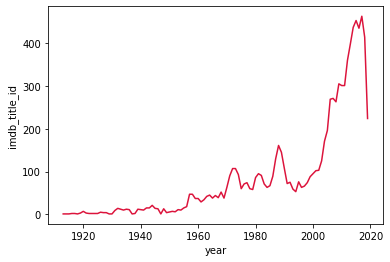

In [16]:
ax = sns.lineplot(data = movies_horror_year, 
               x='year',
               y='imdb_title_id',
               color='crimson')

In [17]:
movies_horror_country_grouped = movies_horror.groupby('country_1', as_index=False).agg({'imdb_title_id':'count'})

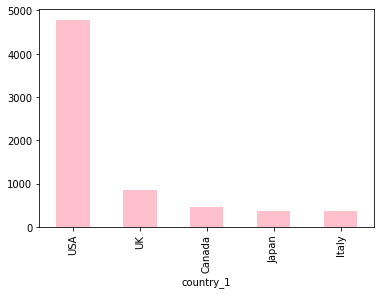

In [18]:
movies_horror.groupby('country_1').imdb_title_id.count().sort_values(ascending=False)[:5].plot.bar(color='pink')

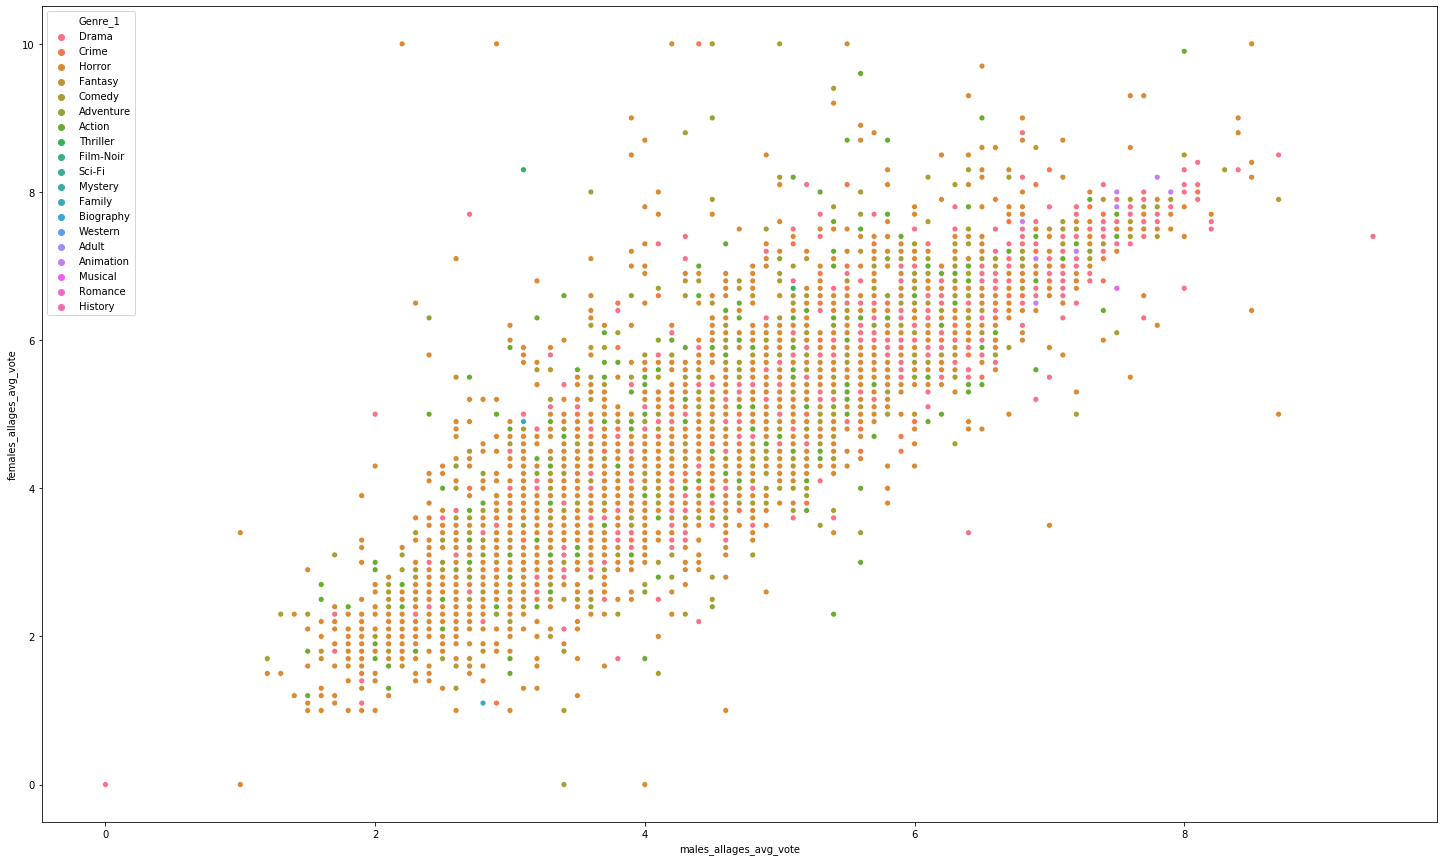

In [19]:
fig, ax = plt.subplots(figsize=(25,15))

ax = sns.scatterplot(x='males_allages_avg_vote', y='females_allages_avg_vote', hue='Genre_1', data=movies_horror)

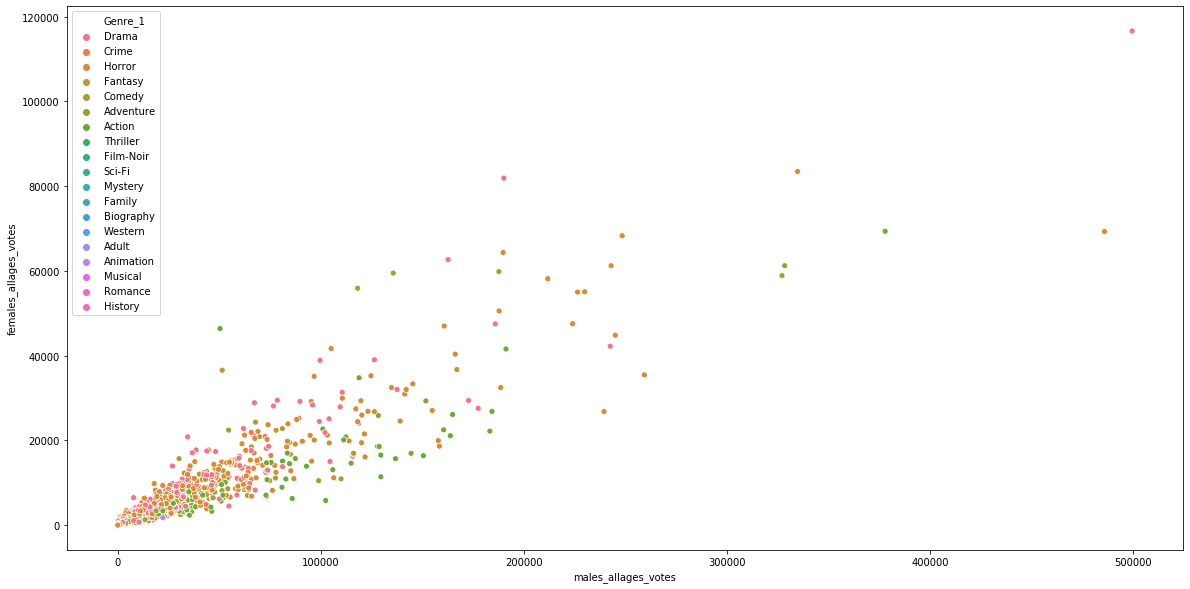

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x='males_allages_votes', y='females_allages_votes', hue='Genre_1', data=movies_horror)

### Stats

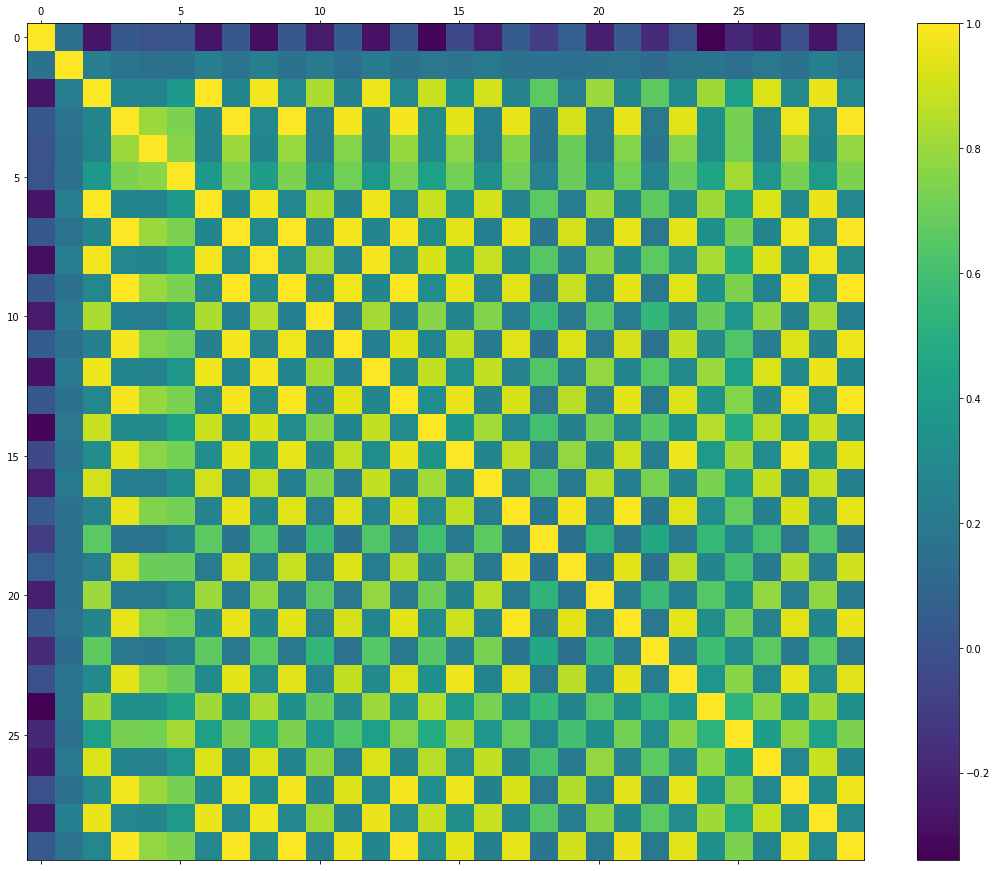

In [21]:
h = plt.figure(figsize=(19,15))

plt.matshow(movies_horror.corr(), fignum=h.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=10);

In [22]:
movies_horror_condensed = movies_horror[['country_1', 'Genre_1', 'Genre_2', 'title', 'year', 'duration', 'males_allages_votes', 'females_allages_votes']]

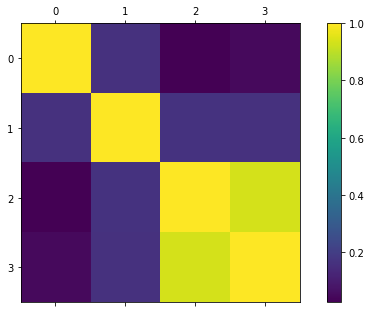

In [23]:
a = plt.figure(figsize=(10, 5))

plt.matshow(movies_horror_condensed.corr(), fignum=a.number)
ab = plt.colorbar()

In [24]:
movies_horror = movies_horror.to_csv('movies_horror.csv', index=False)

## Checking data

In [25]:
movies_horror = pd.read_csv('movies_horror.csv')

In [26]:
movies_horror_country_grouped.head(3)

country_1  imdb_title_id
0  Argentina             42
1  Australia            147
2    Austria             19

In [27]:
movies_horror.loc[movies_horror['weighted_average_vote'] > 8.5]

country_1 Genre_1    Genre_2    Genre_3 imdb_title_id  \
3196     India  Comedy     Horror    Musical     tt0214915   
4875     Egypt   Drama     Horror    Mystery    tt10515086   
4962     India  Comedy     Horror   Thriller    tt10975452   
4983   Iceland  Comedy     Horror        NaN    tt11110904   
7761     India  Horror   Thriller        NaN     tt4228378   
8209       USA  Horror    Mystery   Thriller     tt5266470   
8872   Hungary   Drama     Horror    Mystery     tt7993848   
8876     India   Crime      Drama     Horror     tt8016662   
8990     India   Drama     Horror    Mystery     tt8907932   
9021     India  Horror   Thriller        NaN     tt9378950   

                    title  year date_published  duration  \
3196     Manichitrathazhu  1993     1993-12-23       169   
4875  The Blue Elephant 2  2019     2019-07-25       130   
4962    Raju Gari Gadhi 3  2019     2019-10-18       122   
4983               Þorsti  2019     2019-10-25        90   
7761                 Shhh  1993     1993-12-03       135   
8209               Enigma  2019     2019-11-01       100   
8872  Spirits in the Dark  2019     2019-01-03        70   
8876               Praana  2019     2019-01-18       107   
8990        Kuasha jakhon  2018     2018-01-01       104   
9021                Ghost  2019     2019-10-18       130   

                               language  ... females_30age_avg_vote  \
3196                          Malayalam  ...                    7.8   
4875                             Arabic  ...                    8.2   
4962                             Telugu  ...                    0.0   
4983                          Icelandic  ...                   10.0   
7761                            Kannada  ...                    6.4   
8209                                NaN  ...                    9.0   
8872                            English  ...                    0.0   
8876  Malayalam, Hindi, Telugu, Kannada  ...                    0.0   
8990                            Bengali  ...                    5.7   
9021                     Hindi, English  ...                   10.0   

     females_30age_votes females_45age_avg_vote  females_45age_votes  \
3196                 134                    5.0                   23   
4875                  59                    5.8                    5   
4962                   0                    0.0                    0   
4983                   3                   10.0                    1   
7761                   9                    1.0                    2   
8209                 106                    9.0                   36   
8872                   0                    5.0                    1   
8876                   0                    3.0                    2   
8990                   3                    1.0                    1   
9021                 112                   10.0                   32   

      top1000_voters_rating  top1000_voters_votes  us_voters_rating  \
3196                    3.8                    60               7.9   
4875                    1.0                     2               9.1   
4962                    0.0                     0               7.0   
4983                    0.0                     0               9.4   
7761                    2.1                    16               7.4   
8209                    4.2                     6               9.1   
8872                    3.6                     5               9.8   
8876                    1.7                     3               5.4   
8990                    5.0                     2               5.2   
9021                    6.0                     8              10.0   

      us_voters_votes  non_us_voters_rating  non_us_voters_votes  
3196              551                   8.6                 2552  
4875              462                   8.3                  770  
4962                2                   5.4                   14  
4983               11               

In [28]:
movies_horror['weighted_average_vote'].max()

9.1

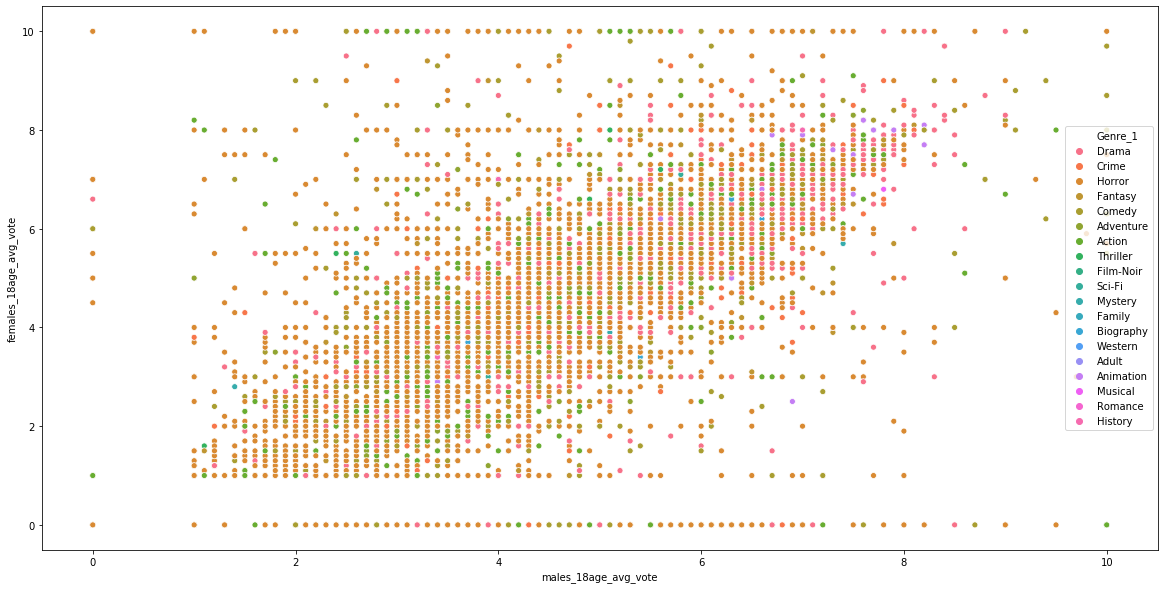

In [29]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.scatterplot(x='males_18age_avg_vote', y='females_18age_avg_vote', hue='Genre_1', data=movies_horror)

sns.kdeplot(data=movies_horror,
           x='year',
           shade=True,
           color='r')

## Group by countries (incomplete)

In [30]:
data_movies_ratings = pd.read_csv('data_movies_ratings.csv')

In [31]:
data_movies_ratings

imdb_title_id                                              title  year  \
0         tt0000574                        The Story of the Kelly Gang  1906   
1         tt0001892                                     Den sorte drøm  1911   
2         tt0002101                                          Cleopatra  1912   
3         tt0002130                                          L'Inferno  1911   
4         tt0002199  From the Manger to the Cross; or, Jesus of Naz...  1912   
...             ...                                                ...   ...   
81268     tt9903716                                             Jessie  2019   
81269     tt9905412                                              Ottam  2019   
81270     tt9905462                                          Pengalila  2019   
81271     tt9911774                          Padmavyuhathile Abhimanyu  2019   
81272     tt9914286                                  Sokagin Çocuklari  2019   

      date_published                      genre  duration           country  \
0         1906-12-26    Biography, Crime, Drama        70         Australia   
1         1911-08-19                      Drama        53  Germany, Denmark   
2         1912-11-13             Drama, History       100               USA   
3         1911-03-06  Adventure, Drama, Fantasy        68             Italy   
4         1913-01-01           Biography, Drama        60               USA   
...              ...                        ...       ...               ...   
81268     2019-03-15           Horror, Thriller       106             India   
81269     2019-03-08                      Drama       120             India   
81270     2019-03-08                      Drama       111             India   
81271     2019-03-08                      Drama       130             India   
81272     2019-03-15              Drama, Family        98            Turkey   

        language                             director  \
0            NaN                         Charles Tait   
1            NaN                            Urban Gad   
2        English                   Charles L. Gaskill   
3        Italian  Francesco Bertolini, Adolfo Padovan   
4        English                        Sidney Olcott   
...          ...                                  ...   
81268     Telugu                      Aswani Kumar V.   
81269  Malayalam                                  Zam   
81270  Malayalam                        T.V. Chandran   
81271  Malayalam                      Vineesh Aaradya   
81272    Turkish                    Ahmet Faik Akinci   

                                      writer  ... females_30age_avg_vote  \
0                               Charles Tait  ...                    6.0   
1      Urban Gad, Gebhard Schätzler-Perasini  ...                    5.8   
2                           Victorien Sardou  ...                    5.5   
3                            Dante Alighieri  ...                    7.3   
4                              Gene Gauntier  ...                    4.8   
...                                      ...  ...                    ...   
81268                        Aswani Kumar V.  ...                    5.6   
81269                       Rajesh k Narayan  ...                    0.0   
81270                          T.V. Chandran  ...                    0.0   
81271       Vineesh Aaradya, Vineesh Aaradya  ...                    0.0   
81272         Ahmet Faik Akinci, Kasim Uçkan  ...                    0.0   

       females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                       19                     6.6                   14   
1                        4                     6.5                    8   
2                       14                     6.2                   20   
3                       74                     7.4                   75   
4                       10                     6.5                   15   
...                    ...                     .

In [32]:
data_movies_countries = (data_movies_ratings['country'].str.split(',', expand=True)).reset_index(drop=True)

In [33]:
data_movies_countries = data_movies_countries[0]

In [34]:
len(data_movies_countries)

81273

In [35]:
movies_tryout = pd.concat([data_movies_countries, data_movies_ratings], axis=1)

In [36]:
movies_tryout = movies_tryout.drop('country', axis=1)


In [37]:
movies_tryout=movies_tryout.rename({0:'country'}, axis=1)
movies_tryout

country imdb_title_id  \
0      Australia     tt0000574   
1        Germany     tt0001892   
2            USA     tt0002101   
3          Italy     tt0002130   
4            USA     tt0002199   
...          ...           ...   
81268      India     tt9903716   
81269      India     tt9905412   
81270      India     tt9905462   
81271      India     tt9911774   
81272     Turkey     tt9914286   

                                                   title  year date_published  \
0                            The Story of the Kelly Gang  1906     1906-12-26   
1                                         Den sorte drøm  1911     1911-08-19   
2                                              Cleopatra  1912     1912-11-13   
3                                              L'Inferno  1911     1911-03-06   
4      From the Manger to the Cross; or, Jesus of Naz...  1912     1913-01-01   
...                                                  ...   ...            ...   
81268                                             Jessie  2019     2019-03-15   
81269                                              Ottam  2019     2019-03-08   
81270                                          Pengalila  2019     2019-03-08   
81271                          Padmavyuhathile Abhimanyu  2019     2019-03-08   
81272                                  Sokagin Çocuklari  2019     2019-03-15   

                           genre  duration   language  \
0        Biography, Crime, Drama        70        NaN   
1                          Drama        53        NaN   
2                 Drama, History       100    English   
3      Adventure, Drama, Fantasy        68    Italian   
4               Biography, Drama        60    English   
...                          ...       ...        ...   
81268           Horror, Thriller       106     Telugu   
81269                      Drama       120  Malayalam   
81270                      Drama       111  Malayalam   
81271                      Drama       130  Malayalam   
81272              Drama, Family        98    Turkish   

                                  director  \
0                             Charles Tait   
1                                Urban Gad   
2                       Charles L. Gaskill   
3      Francesco Bertolini, Adolfo Padovan   
4                            Sidney Olcott   
...                                    ...   
81268                      Aswani Kumar V.   
81269                                  Zam   
81270                        T.V. Chandran   
81271                      Vineesh Aaradya   
81272                    Ahmet Faik Akinci   

                                      writer  ... females_30age_avg_vote  \
0                               Charles Tait  ...                    6.0   
1      Urban Gad, Gebhard Schätzler-Perasini  ...                    5.8   
2                           Victorien Sardou  ...                    5.5   
3                            Dante Alighieri  ...                    7.3   
4                              Gene Gauntier  ...                    4.8   
...                                      ...  ...                    ...   
81268                        Aswani Kumar V.  ...                    5.6   
81269                       Rajesh k Narayan  ...                    0.0   
81270                          T.V. Chandran  ...                    0.0   
81271       Vineesh Aaradya, Vineesh Aaradya  ...                    0.0   
81272         Ahmet Faik Akinci, Kasim Uçkan  ...                    0.0   

       females_30age_votes  females_45age_avg_vote  females_45age_votes  \
0                       19                     6.6                   14   
1                        4                     6.5                    8   
2                       14                     6.2                   20   
3                       74                     7.4                   75   
4                       10                     6.5                   15   
...                    ...

In [42]:
movies_tryout_country = movies_tryout.groupby('country', as_index=False).agg({'imdb_title_id':'count'})

In [43]:
movies_tryout_country

country  imdb_title_id
0     Afghanistan              6
1         Albania             15
2         Algeria             17
3         Andorra              1
4          Angola              4
..            ...            ...
152       Vietnam             48
153  West Germany            583
154         Yemen              3
155    Yugoslavia            288
156        Zambia              1

[157 rows x 2 columns]

In [52]:
compare_countries_horror = pd.merge([movies_tryout_country, movies_horror_country_grouped], on='country' how='left')

SyntaxError: invalid syntax (<ipython-input-52-9a1ec9751210>, line 1)

In [49]:
compare_countries_horror

imdb_title_id
0               6
1              15
2              17
3               1
4               4
..            ...
80              1
81              2
82              5
83             51
84             13

[242 rows x 1 columns]